# Different Signal Graphs

# A. Import Library

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Common wave patterns:
1. Sine, Cosine, Tangent wave 
2. Low and High Pull Square wave
3. Triangle wave
4. Sawtooth
5. Amplifier

# Part B. Project Set Up
- The sampling rate is 50 Hz
- Most of time should only show 1 Hz signal to easy to identify the result of convolution

## B1. Test triangle wave form

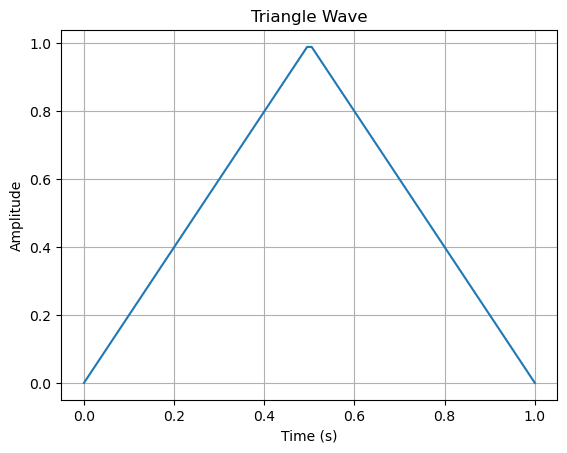

In [2]:
# Generate data
t = np.linspace(0, 1, 100)
f = 1 # 5Hz = 0.2s
y = np.abs(2*f*t - 2*np.floor(f*t + 0.5))

# Plot the data
plt.plot(t, y)

# Customize the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Triangle Wave')
plt.grid(True)

# Display the plot
plt.show()

## B2. Test sine wave form

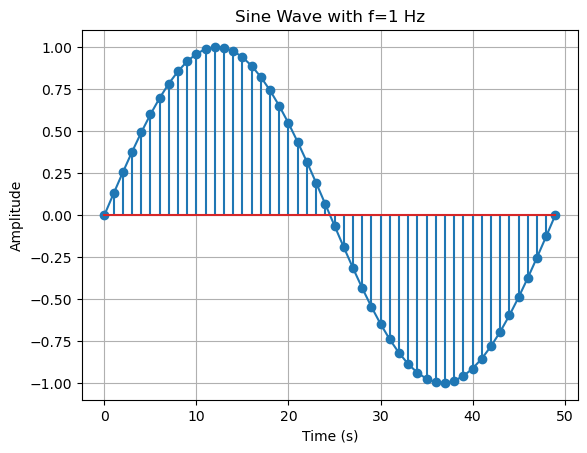

In [3]:
# Define the frequency and time range
f = 1 # frequency in Hz

t = np.linspace(0, 1, 50) # time range in seconds

# Generate the sine wave
y = np.sin(2*np.pi*f*t)

# Plot the data
plt.plot(y)
plt.stem(y)
# Customize the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave with f={} Hz'.format(f))
plt.grid(True)

# Display the plot
plt.show()

# Part C. Build Convolution Table

In [6]:
wave_table = [
    "sin",
    "cos",
    "tan",
    "square_low",
    "square_high",
    "triangle",
    "sawtooth",
    "amplifier", # I forget the terminology of a singal dot
]

def sin(f,t):
    return np.sin(2*np.pi*f*t)

def cos(f,t):
    return np.cos(2*np.pi*f*t)

def tan(f,t):
    return np.tan(2*np.pi*f*t)

def square_low(f,t):
    return np.array([0,0,0,0,0,1,1,1,1,1])

def square_high(f,t):
    return np.array([1,1,1,1,1])

def triangle(f,t):
    return np.abs(2*f*t - 2*np.floor(f*t + 0.5))

def sawtooth(f,t):
    return 2*f*t - 2*np.floor(f*t + 0.5)

def amplifier(f,t):
    return np.array([3])

In [7]:
len(wave_table)

8

In [ ]:
length = len(wave_table)+1

f, t = 1, np.linspace(0, 1, 20)

plt.figure(figsize=(54,45))
# plot first row, 2 to 9
for i, wave_form in enumerate(wave_table):
    plt.subplot(length,length,i+2)
    plt.title(wave_form)
    func = eval(wave_form)
    y = func(f, t)
    plt.plot(y)
    plt.stem(y)

# plot first column, 10, 19 ... 73
for i, wave_form in enumerate(wave_table):
    plt.subplot(length,length,(i+1)*length+1)
    plt.title(wave_form)
    func = eval(wave_form)
    y = func(f, t)
    plt.plot(y)
    plt.stem(y)

    
# i = 0
# # 0-7
for i, each1 in enumerate(wave_table):
    for j, each2 in enumerate(wave_table):
            plt.subplot(length,length,(i+1)*length+j+2)
            plt.title(each1+"+"+each2)
            func1 = eval(each1)
            func2 = eval(each2)
            y1 = func1(f, t)
            y2 = func2(f, t)
            temp = np.convolve(y1, y2)
            
            plt.plot(temp)
            plt.stem(temp)
plt.show()